# Tour de France Speed and Drug Use

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('white'); sns.set_context('poster')
from time import time

matplotlib.rcParams['figure.figsize'] = (16, 9)
pd.options.display.max_columns = 999

## Load and Prepare Tour de France Data

Raw data scraped from the <a href="https://www.letour.fr/en/history">official Tour de France website</a>.

In [2]:
raw_tdf = pd.read_table('tdf_raw_text.txt', header=None)
print(raw_tdf.shape)
raw_tdf.head()

(937, 1)


,0
0,1903
1,6
2,60
3,21
4,2 428


In [3]:
len(raw_tdf)/9

104.11111111111111

There is an errant value in the raw data - we need to remove this.

In [4]:
raw_tdf[-114:-109]

,0
823,3 593
824,86 h 15’ 02’
825,’
826,41.654
827,L. Armstrong (USA)


In [5]:
raw_tdf.drop(825, axis=0, inplace=True)
raw_tdf = raw_tdf.reindex()

In [6]:
tdf = pd.DataFrame(raw_tdf.values.reshape(104, 9))
tdf.columns = ['year', 'n_stages', 'n_entrants', 'n_finishers', 'distance',
               'winning_time', 'average_speed', 'winner', 'age']
tdf.head()

,year,n_stages,n_entrants,n_finishers,distance,winning_time,average_speed,winner,age
0,1903,6,60,21,2 428,94 h 33’ 00’’,25.679,M. Garin (Fra),32
1,1904,6,88,27,2 428,96 h 05’ 56’’,25.265,H. Cornet (Fra),20
2,1905,11,60,24,2 994,110 h 26’ 58’’,27.107,L. Trousselier (Fra),24
3,1906,13,82,14,4 637,189 h 34’ 00’’,24.463,R. Pottier (Fra),27
4,1907,14,93,33,4 488,158 h 45’ 05’’,28.470,L. Petit-Breton (Fra),24


In [7]:
tdf[['year', 'n_entrants']] = tdf[['year', 'n_entrants']].astype(int)
tdf['average_speed'] = tdf['average_speed'].astype(float)

## Load and Prepare Doping Data

Raw data scraped from <a href="http://www.cyclisme-dopage.com/chiffres/tdf-vraischiffres.htm">http://www.cyclisme-dopage.com</a>.

In [8]:
raw_dope = pd.read_table('tdf_dopers.txt', header=None)
print(raw_dope.shape)
raw_dope.head()

(50, 10)


,0,1,2,3,4,5,6,7,8,9
0,1968,110,38,"34,5%",6,60%,3,"100,0%",1,100%
1,1969,130,64,"49,2%",9,90%,3,"100,0%",1,100%
2,1970,150,58,"38,7%",5,50%,2,"66,7%",1,100%
3,1971,130,56,"43,1%",9,90%,3,"100,0%",1,100%
4,1972,132,66,"50,0%",9,90%,3,"100,0%",1,100%


In [9]:
dope = raw_dope.copy()
dope.columns = ['year', 'n_entrants', 'n_entrants_doped', 'p_entrants_doped',
                'n_top10_doped', 'p_top10_doped', 'n_podium_doped',
                'p_podium_doped', 'n_winner_doped', 'p_winner_doped']
dope.drop(['n_entrants', 'p_entrants_doped', 'p_top10_doped', 'p_podium_doped',
           'p_winner_doped'], axis=1, inplace=True)
dope.head()

,year,n_entrants_doped,n_top10_doped,n_podium_doped,n_winner_doped
0,1968,38,6,3,1
1,1969,64,9,3,1
2,1970,58,5,2,1
3,1971,56,9,3,1
4,1972,66,9,3,1


## Full Dataset

In [44]:
df = pd.merge(tdf, dope)
df['p_entrants_doped'] = df['n_entrants_doped'] / df['n_entrants'] * 100
df.head()

,year,n_stages,n_entrants,n_finishers,distance,winning_time,average_speed,winner,age,n_entrants_doped,n_top10_doped,n_podium_doped,n_winner_doped,p_entrants_doped
0,1968,22,110,63,4 492,133 h 49’ 32’’,33.556,J. Janssen (Ned),28,38,6,3,1,34.545455
1,1969,22,130,86,4 117,116 h 16’ 02’’,35.409,E. Merckx (Bel),24,64,9,3,1,49.230769
2,1970,23,150,100,4 254,119 h 31’ 49’’,35.589,E. Merckx (Bel),25,58,5,2,1,38.666667
3,1971,20,130,94,3 608,96 h 45’ 14’’,38.084,E. Merckx (Bel),26,56,9,3,1,43.076923
4,1972,20,132,88,3 846,108 h 17’ 18’’,35.514,E. Merckx (Bel),27,66,9,3,1,50.000000


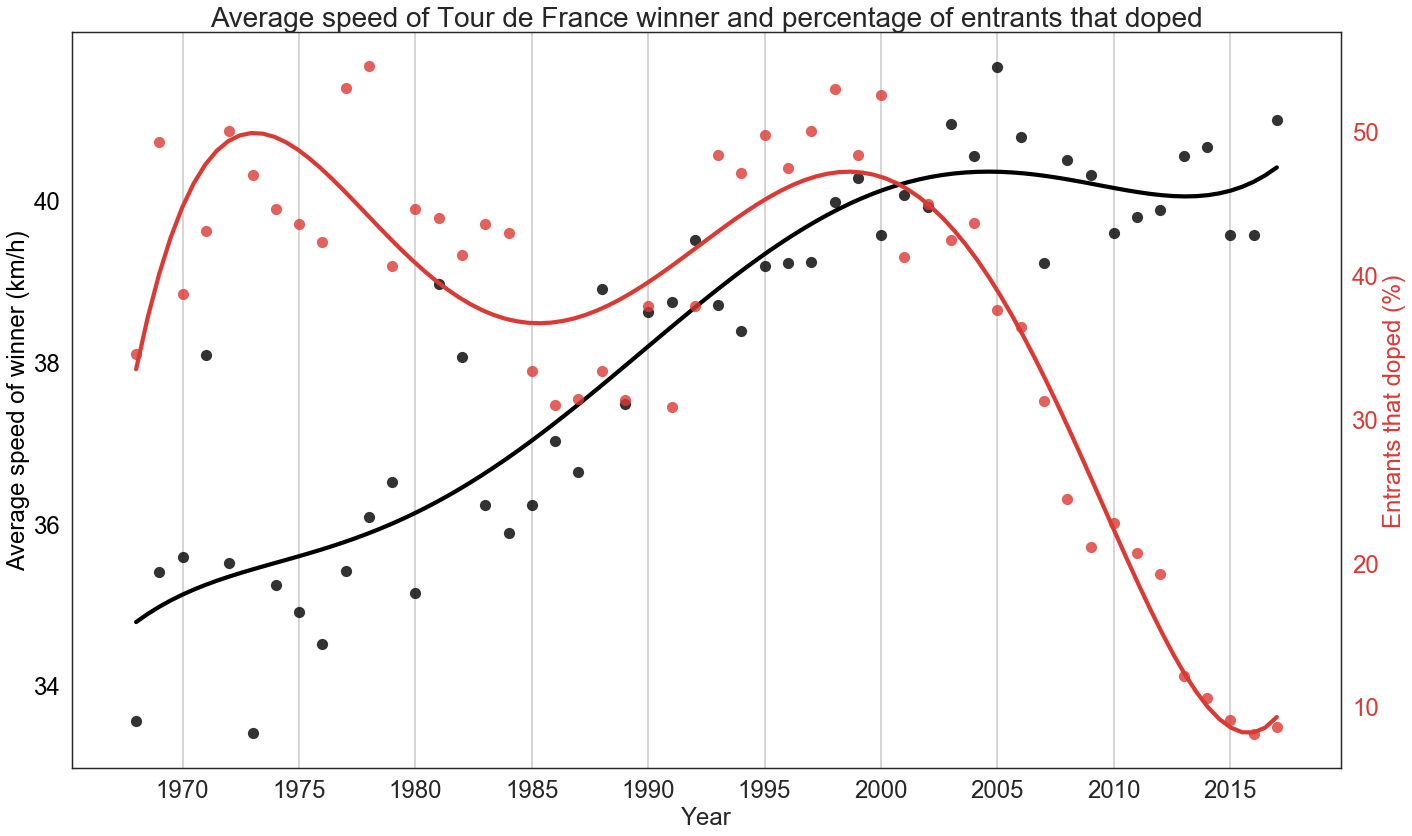

In [50]:
colour_speed = 'k'
colour_doped = '#db3a34'
order = 5
ci = 0

fig, ax1 = plt.subplots(figsize=(20, 12))
sns.regplot(x='year', y='average_speed', data=df, ax=ax1, color=colour_speed,
            order=order, truncate=True, ci=ci)
ax1.set_ylabel('Average speed of winner (km/h)', color=colour_speed, fontsize=24)
ax1.tick_params('y', colors=colour_speed)
ax1.set_xlabel('Year', fontsize=24)
ax1.set_yticklabels([32, 34, 36, 38, 40], size=24)
ax1.set_xticklabels([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], size=24)
ax1.set_title('Average speed of Tour de France winner and percentage of entrants that doped',
              fontsize=28)
ax1.set_xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
ax2 = ax1.twinx()
sns.regplot(x='year', y='p_entrants_doped', data=df, ax=ax2, color=colour_doped,
            order=order, truncate=True, ci=ci)
ax2.set_ylabel('Entrants that doped (%)', color=colour_doped, fontsize=24)
ax2.tick_params('y', colors=colour_doped)
ax2.set_yticklabels([0, 10, 20, 30, 40, 50, 60], size=24)
ax1.grid(axis='x')
plt.tight_layout()
fig.savefig('tdf.png');